<font face="黑体" size=4 color=#8B0000> 美林时钟周期的划分 </font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def Circle_Identify(D):
    #The function is to identify the circle in American Investment Clock Model
    #D is DataFrame
    eco=D['经济同比趋势']
    cpi=D['CPI同比趋势']
    eco_s=D['经济同比趋势']-D['经济同比趋势'].shift(1)
    cpi_s=D['CPI同比趋势']-D['CPI同比趋势'].shift(1)
    eco_signal=np.sign(eco_s*eco_s.shift(1))# 1: trend no change; -1: trend change
    cpi_signal=np.sign(cpi_s*cpi_s.shift(1))# 1: trend no change; -1: trend change
    eco_pos=eco_signal[eco_signal==-1].index.tolist()
    cpi_pos=cpi_signal[cpi_signal==-1].index.tolist()
    change=set(cpi_pos+eco_pos)
    change=list(change)# the index where the change happened
    change.sort()
    circle_type=[]#record the type of the circle 0: recovery, 1:overheat, 2:stagflation, 3:decline
    for pos in range(0,len(change)):
        compare=D.iloc[change[pos]][1:3]-D.iloc[change[pos]-1][1:3]
        if ((compare['经济同比趋势']<0)&(compare['CPI同比趋势']<0)): 
            circle_type.append(1) #recording the circle type of the next period
        elif((compare['经济同比趋势']<0)&(compare['CPI同比趋势']>0)):
            circle_type.append(0)
        elif((compare['经济同比趋势']>0)&(compare['CPI同比趋势']>0)):
            circle_type.append(3)
        else:
            circle_type.append(2)
    return [change,circle_type]

<font face="黑体" size=4 color=#8B0000> This is the situation of the USA </font>

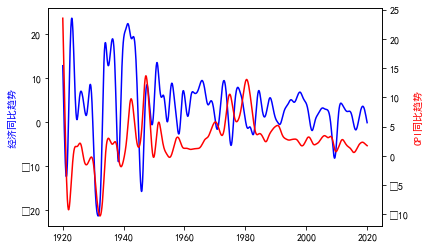

In [19]:
import os
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] # for the normal demonstration of chinese words
os.chdir('D:\各种材料\研究生\公众号\三、美林时钟模型')
D=pd.read_excel('美国经济通胀滤波.xlsx')
eco=D['经济同比趋势']
cpi=D['CPI同比趋势']
x=D['日期']
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(x,eco,color='b')
ax2.plot(x,cpi,color='r')
ax1.set_ylabel("经济同比趋势",color="b")
ax2.set_ylabel("CPI同比趋势",color="r")
[change,circle_type]=Circle_Identify(D)

In [21]:
[change,circle_type]=Circle_Identify(D)
#[change,circle_type]
[change,circle_type]

[[15,
  24,
  37,
  52,
  56,
  57,
  69,
  73,
  93,
  94,
  109,
  114,
  140,
  147,
  169,
  180,
  181,
  196,
  197,
  207,
  220,
  230,
  257,
  270,
  272,
  279,
  299,
  311,
  328,
  332,
  352,
  359,
  372,
  379,
  390,
  396,
  413,
  421,
  430,
  453,
  458,
  476,
  480,
  486,
  493,
  505,
  512,
  523,
  549,
  574,
  585,
  602,
  609,
  628,
  635,
  658,
  663,
  685,
  690,
  725,
  729,
  737,
  750,
  766,
  773,
  776,
  795,
  800,
  817,
  846,
  855,
  892,
  899,
  912,
  915,
  934,
  943,
  969,
  982,
  992,
  1024,
  1031,
  1045,
  1055,
  1071,
  1076,
  1096,
  1102,
  1122,
  1129,
  1147,
  1154,
  1180,
  1182],
 [2,
  3,
  0,
  1,
  0,
  3,
  2,
  1,
  2,
  3,
  0,
  1,
  2,
  3,
  0,
  3,
  2,
  3,
  0,
  1,
  2,
  3,
  0,
  1,
  2,
  1,
  0,
  3,
  2,
  1,
  2,
  3,
  0,
  1,
  2,
  1,
  2,
  3,
  0,
  1,
  2,
  1,
  0,
  1,
  2,
  3,
  0,
  3,
  0,
  3,
  0,
  1,
  2,
  3,
  0,
  1,
  2,
  3,
  0,
  1,
  2,
  1,
  2,
  3,
  0,
  1,
  2,
  

<font face="黑体" size=4 color=#8B0000>The following is the situation of China <font>

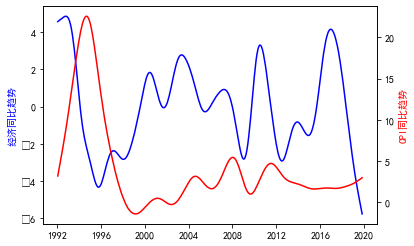

In [8]:
D_china=pd.read_excel('中国经济通胀滤波.xlsx')
eco=D_china['经济同比趋势']
cpi=D_china['CPI同比趋势']
x=D_china['日期']
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(x,eco,color='b')
ax2.plot(x,cpi,color='r')
ax1.set_ylabel("经济同比趋势",color="b")
ax2.set_ylabel("CPI同比趋势",color="r")
[change,circle_type]=Circle_Identify(D_china)

In [9]:
[change,circle_type]=Circle_Identify(D_china)
#[change,circle_type]

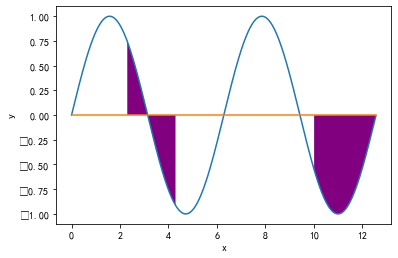

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.0,4.0*np.pi,0.01)
y=np.sin(x)
plt.plot(x, y)
plt.plot((x.min(),x.max()), (0,0))
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(x,y, where=(2.3<x) & (x<4.3) | (x>10), facecolor='purple')
plt.show()

In [11]:
A=pd.DataFrame([1,2,3,4,5])

B=A-A.shift(1)
B

,0
0,NaN
1,1.0
2,1.0
3,1.0
4,1.0


In [16]:
A.shift(1)
A.iloc[3-1]

0    3
Name: 2, dtype: int64